问题描述：

草原上有2000只黑羊和2000只白羊，它们不会死亡和新生。每天都有一只羊被随机选中，该随机选择与以前的选择无关。 这只被选中的羊会找到一只与之异色的羊（如果还有的话）并对其鸣叫。一只黑羊对准一只白羊鸣叫会使白羊以概率$p$发生变色（变为黑羊）；一只白羊对准一只黑羊鸣叫会使黑羊以概率$q$发生变色（变为白羊）。管理者每天可以在神奇的羊变色现象发生前进场移走任意数量的白羊。管理者的目标是使得最后所剩黑羊数量的期望值尽可能大。譬如，头天就移走所有白羊，可以保证最后保住2000只黑羊。试针对一些不同的$p,q$取值来给管理者建议管理策略以及对最好可能的黑羊遗留数量做出估计。

以下程序的运行结果中，

a 按照[sum][黑羊数]索引，代表最终的黑羊期望值

ind按照[sum]索引，代表该总和下，弃羊-不弃的临界点。

In [56]:
# 这是初始化
from scipy.special import comb;
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

def distribute(n,t):
    """
        创建一个0->1的range(n+1)数组，其值为被“全部黑羊”事件吸收的概率。
        t=q/p
    """
    # delta=np.array([pow(t,i)*comb(n-1,i) for i in range(n)])/pow(1+t,n-1);
    a=[0]; delta=[-math.log(1+t)*(n-1)];
    # delta 存为其对数值，因为实在太大了
    for i in range(1,n):
        delta.append(delta[i-1]+math.log(t*(n-i)/i));
    for i in range(n):
        a.append(math.exp(delta[i])+a[i]);
    return a;

a=[[0]];
# a 按照[sum][黑羊数]索引，代表最终的黑羊期望值
ind=[0];
# ind按照[sum]索引，代表该总和下，弃羊-不弃的临界点。
t=8/5;

In [61]:
# it takes 7s for n = 4001
n=6001;
for sum in range(len(a),n):
    d=distribute(sum,t);
    l=-1; r=sum; index=-1;
    for i in range(ind[sum-1],sum):
        if l<(a[sum-1][i]-r*d[i])/(1-d[i]):
            l=(a[sum-1][i]-r*d[i])/(1-d[i]);
            index=i;
        else: break;
    ind.append(index);
    a.append(a[sum-1][:index]+[l+(r-l)*x for x in d[index:]]);
print(len(a))

6001


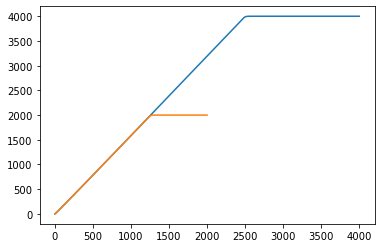

In [1]:
fig, ax = plt.subplots()
ax.plot(a[n-1])
ax.plot(a[n//2])

In [65]:
x=10;m=n;
tmp=[ind[i]*13-8*i+x for i in range(m)];
y=[];
z=[];
for i in range(m):
    if tmp[i] == -1:
        y.append(i);
print(np.max(tmp),
      np.min(tmp),
      y,sep='\n')

12
-1
[3, 16, 29]
